# Relatório do Exercício Programa 3 - Simulação de Atendimento com Clientes Impacientes 

Bruno Impossinato Murozaki - 8516476

Laury Bueno - 5648179


## Introdução
O problema estudado propõe a seguinte situação: clientes são atendidos sequencialmente por uma série de guichês e têm a opção de esperar (ou não) em uma fila caso todos estejam ocupados. A chegada de clientes é guiada por uma distribuição exponencial e a decisão de esperar ou não na fila depende de uma distribuição de Bernoulli.

## Especificações técnicas
Este trabalho foi escrito e documentado na plataforma [Jupyter Notebook](http://jupyter.org/) 5.0.0 e executado com o interpretador Pyhton 3.6.1.

Tanto o PDF quanto o arquivo `.py` disponibilizados por esta entrega foram gerados nesse contexto.

Para ter uma melhor viisualização deste relatório, recomenda-se a leitura no formato original, que está disponível [neste link](https://github.com/laurybueno/Simulacao-de-Atendimentos/blob/master/simulacao_de_atendimentos.ipynb).

Este software depende dos pacotes Matplotlib e Scipy.

### Execução
O programa não tem sua execução customizável por linha de comando (já que isso não é um requisito) e carrega as variáveis especificadas no enunciado deste exercício em seu próprio código.

# Resolução em Python

### Dependências e bibliotecas necessárias para a execução

In [9]:
from random import random, expovariate
from matplotlib import pyplot as plt
from statistics import mean
from scipy.stats import bernoulli

### O método `rodada` é responsável por realizar uma simulação de atendimento de clientes. A configuração das condições da simulação é feita por variáveis globais que devem ser especificadas antes da chamada

In [10]:
def rodada():
    gt = [0] * n  # instante em que cada guichê estará disponível
    k = 0  # contador de clientes que entraram na fila até o momento
    ct = []  # vetor de tamanho variável em que ctcheg[k] > 0 denota o instante em que o k-ésimo cliente chegou
    x = 0  # contador de clientes já atendidos
    y = 0  # contador de clientes que foram embora sem entrar na fila;
    r = 0  # comprimento atual da fila
    tm = 0  # tempo máximo de permanência dentre todos os clientes atendidos até o momento
  
    # Encontre o momento de chegada do primeiro cliente
    momento = expovariate(lamb)  # instante atual
    while momento < t:
        # Contabilize a chegada deste cliente 
        k += 1
        ct.append(momento)
        
        # Processe quais clientes foram atendidos deste a última iteração do loop principal
        while min(gt) < momento and x < k:
            x += 1
            j = gt.index(min(gt))
            a = expovariate(mi)
            gt[j] = max(gt[j], ct[x-1]) + a
            tm = max(tm, (gt[j] - ct[x-1]))
        
        r = max(0, ((k - 1) - x))  # não considere o último cliente
        
        # Decida se o cliente atual vai ficar na fila
        pr = r/(r + n)
        if(bernoulli.rvs(pr)) == 1:
            k = k - 1
            y = y + 1
        
        r = k - x
        w = y/(x + y + r)
        
        # Encontre o momento de chegada do próximo cliente
        momento += expovariate(lamb)
        
    return {
        'x': x,
        'y': y,
        'r': r,
        'w': w,
        'tm':tm
    }

### Dados da primeira simulação pedida ficarão armazenados na lista `iteracoes1`
Parâmetros usaados: n = 6, λ = 3, µ = 0.5

In [3]:
n = 6  # número de guichês
lamb = 3  # taxa de entrada de clientes
mi = .5  # taxa de atendimentos a clientes por cada guichê
t = 50  # intervalo de tempo total sobre o qual se deseja calcular as médias de aceitações e rejeições
rodadas = 20000  # número de iterações da simulação

iteracoes1 = []
for i in range(rodadas):
    iteracoes1.append(rodada())

### Dados da segunda simulação pedida ficarão armazenados na lista `iteracoes2`

Parâmetros usaados: n = 5, λ = 3, µ = 0.5

In [4]:
n = 5  # número de guichês
lamb = 3  # taxa de entrada de clientes
mi = .5  # taxa de atendimentos a clientes por cada guichê
t = 50  # intervalo de tempo total sobre o qual se deseja calcular as médias de aceitações e rejeições
rodadas = 20000  # número de iterações da simulação

iteracoes2 = []
for i in range(rodadas):
    iteracoes2.append(rodada())

# Análise gráfica das simulações 

### Quantos clientes foram atendidos?
Com mais guichês disponíveis, mais clientes são atendidos com maior frequência. 

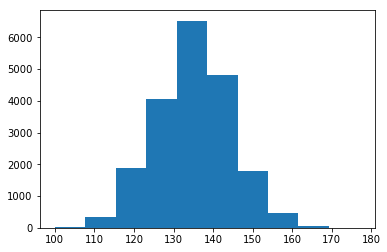

In [5]:
plt.hist([i['x'] for i in iteracoes1])
plt.show()

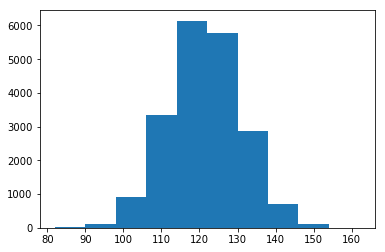

In [6]:
plt.hist([i['x'] for i in iteracoes2])
plt.show()

### Qual o número esperado de clientes que foram embora até o instante T?
Quando temos menos guichês disponíveis, vemos que a taxa de rejeições aumenta, tendo em vista que o comprimento médio da fila também aumenta.

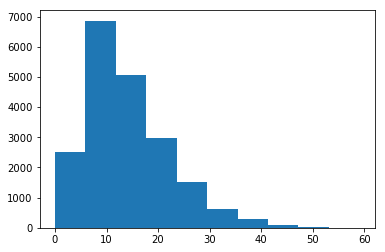

In [7]:
plt.hist([i['y'] for i in iteracoes1])
plt.show()

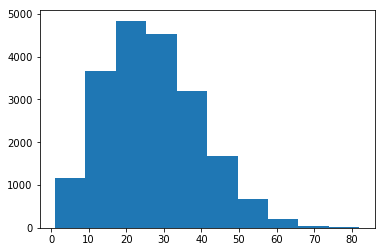

In [8]:
plt.hist([i['y'] for i in iteracoes2])
plt.show()

### Qual a proporção de clientes que foram embora?

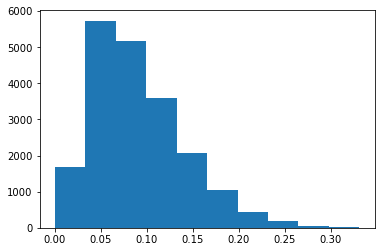

In [9]:
plt.hist([i['w'] for i in iteracoes1])
plt.show()

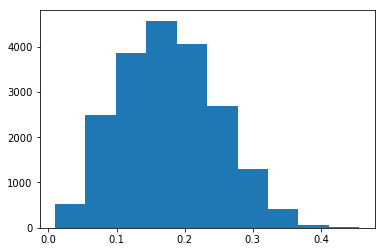

In [10]:
plt.hist([i['w'] for i in iteracoes2])
plt.show()

### Comprimento final da fila em cada iteração

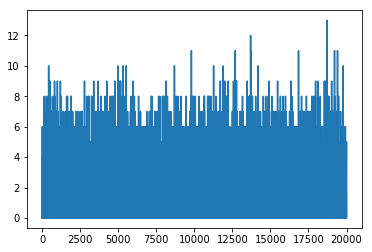

In [11]:
plt.plot([i['r'] for i in iteracoes1])
plt.show()

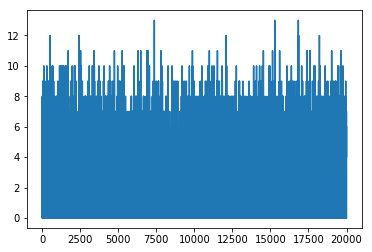

In [12]:
plt.plot([i['r'] for i in iteracoes2])
plt.show()

### Considerando apenas os clientes que foram efetivamente atendidos, qual o valor esperado do tempo máximo de permanência dos clientes desde sua chegada até o término de seu atendimento?

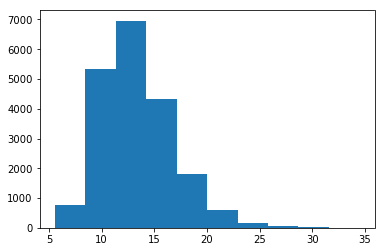

In [13]:
plt.hist([i['tm'] for i in iteracoes1])
plt.show()

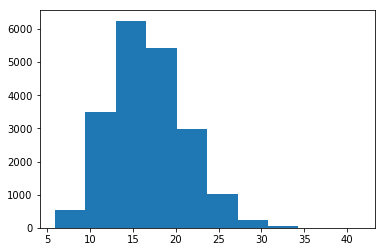

In [14]:
plt.hist([i['tm'] for i in iteracoes2])
plt.show()

### Médias parciais de w (taxa de rejeição)

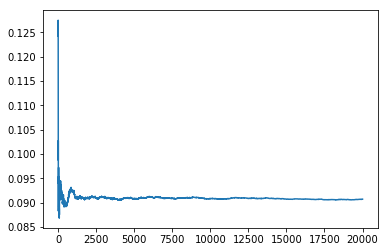

In [27]:
media_parcial = []
total_parcial  = 0
k = 1
while k <= len(iteracoes1):
    total_parcial += iteracoes1[k-1]['w']
    media_parcial.append(total_parcial/k)
    k += 1
    
plt.plot(media_parcial)
plt.show()

Com menor número de guichês, a convergência é mais ráṕida.

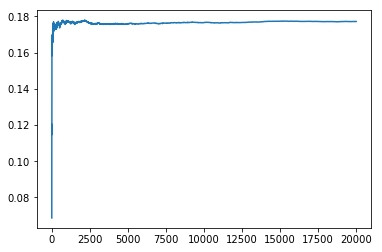

In [29]:
media_parcial = []
total_parcial  = 0
k = 1
while k <= len(iteracoes2):
    total_parcial += iteracoes2[k-1]['w']
    media_parcial.append(total_parcial/k)
    k += 1

plt.plot(media_parcial)
plt.show()

### Médias parciais de tm (tempo máximo de permanência)

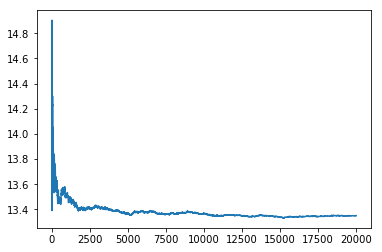

In [15]:
media_parcial = []
total_parcial  = 0
k = 1
while k <= len(iteracoes1):
    total_parcial += iteracoes1[k-1]['tm']
    media_parcial.append(total_parcial/k)
    k += 1

    
plt.plot(media_parcial)
plt.show()

Com menos guichês, a convergência da média é alcançada mais rapidamente.

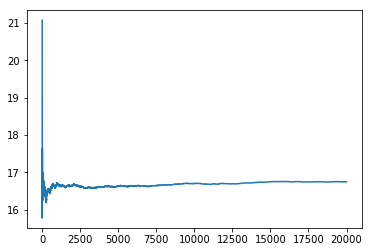

In [16]:
media_parcial = []
total_parcial  = 0
k = 1
while k <= len(iteracoes2):
    total_parcial += iteracoes2[k-1]['tm']
    media_parcial.append(total_parcial/k)
    k += 1

    
plt.plot(media_parcial)
plt.show()

# Análises numéricas das simulações

### Médias finais de variáveis relevantes

Média final de x com 6 guichês

In [17]:
sum([i['x'] for i in iteracoes1])/len(iteracoes1)

135.06665

Média final de x com 5 guichês

In [18]:
sum([i['x'] for i in iteracoes2])/len(iteracoes2)

120.9132

Média final de y com 6 guichês

In [19]:
sum([i['y'] for i in iteracoes1])/len(iteracoes1)

13.9178

Média final de y com 5 guichês

In [20]:
sum([i['y'] for i in iteracoes2])/len(iteracoes2)

27.09925

Média final de r com 6 guichês

In [21]:
sum([i['r'] for i in iteracoes1])/len(iteracoes1)

0.947

Média final de r com 5 guichês

In [22]:
sum([i['r'] for i in iteracoes2])/len(iteracoes2)

1.99475

Média final de w com 6 guichês

In [23]:
sum([i['w'] for i in iteracoes1])/len(iteracoes1)

0.09068366104481922

Média final de w com 5 guichês

In [24]:
sum([i['w'] for i in iteracoes2])/len(iteracoes2)

0.17711888932153116

Média final de tm com 6 guichês

In [25]:
sum([i['tm'] for i in iteracoes1])/len(iteracoes1)

13.349392100662653

Média final de tm com 5 guichês

In [26]:
sum([i['tm'] for i in iteracoes2])/len(iteracoes2)

16.74218711829892

### Probabilidade de o tempo máximo ser maior do que 15
Naturalmente, esse valor varia de acordo com o número de guichês.

Para 6 guichês, temos uma probabilidade relativamente baixa:

In [33]:
len([i for i in iteracoes1 if i['tm'] > 15])/len(iteracoes1)

0.2742

Para 5 guichês, por outro lado, a chance de o tempo máximo passar de 15 fica muito maior:

In [34]:
len([i for i in iteracoes2 if i['tm'] > 15])/len(iteracoes2)

0.6292

# Cálculo de probabilidade de `w <= 0.2`
###  Quantos guichês são necessários para chegar ter-se w menor ou igual a 20% com 95% de confiabilidade?

Para chegar a esse resultado, serão realizados uma série de simulações com números de guichês entre 1 e 10. Em seguida, serão calculadas as taxas de rejeição de cada simulação em para cada cenário.

In [18]:
lamb = 4  # taxa de entrada de clientes
mi = .5  # taxa de atendimentos a clientes por cada guichê
t = 60  # intervalo de tempo total sobre o qual se deseja calcular as médias de aceitações e rejeições
rodadas = 2000  # número de iterações da simulação

for nProposto in range(1, 11):
    
    n = nProposto
    iteracoes = []
    for i in range(rodadas):
        iteracoes.append(rodada())

    # Descubra se as condições do problema foram satisfeitas com o nProposto atual
    if len([i for i in iteracoes if i['w'] <= 0.2])/len(iteracoes) >= 0.95:
        print("Número de guichês satisfatório: " + str(n))

Número de guichês satisfatório: 8
Número de guichês satisfatório: 9
Número de guichês satisfatório: 10


Com os resultados acima, fica claro que para termos uma taxa de rejeição menor do que 20% com 95% de confiabilidade, são necessários pelo menos 8 guichês de atendimento.